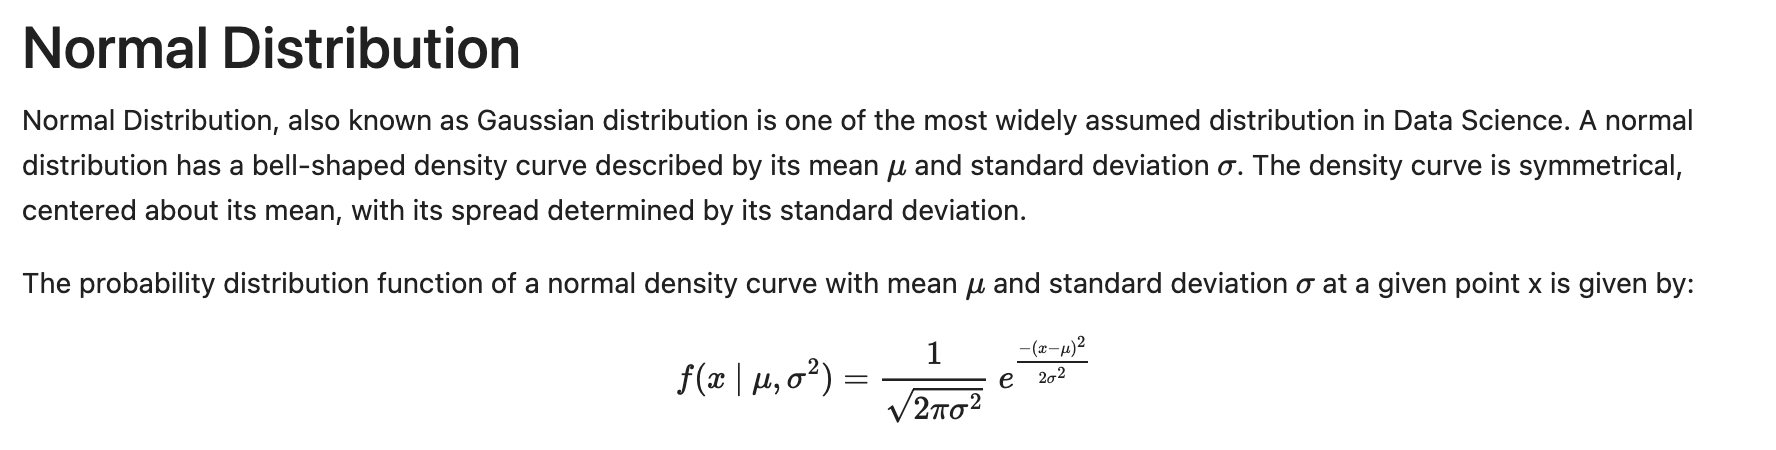

European Call Option Price using Binomial Tree Method: 10.29


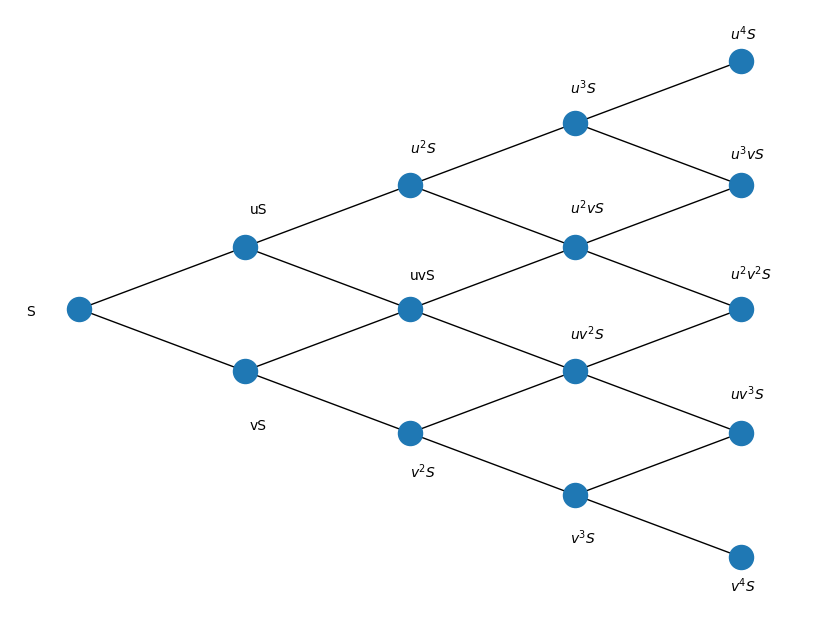

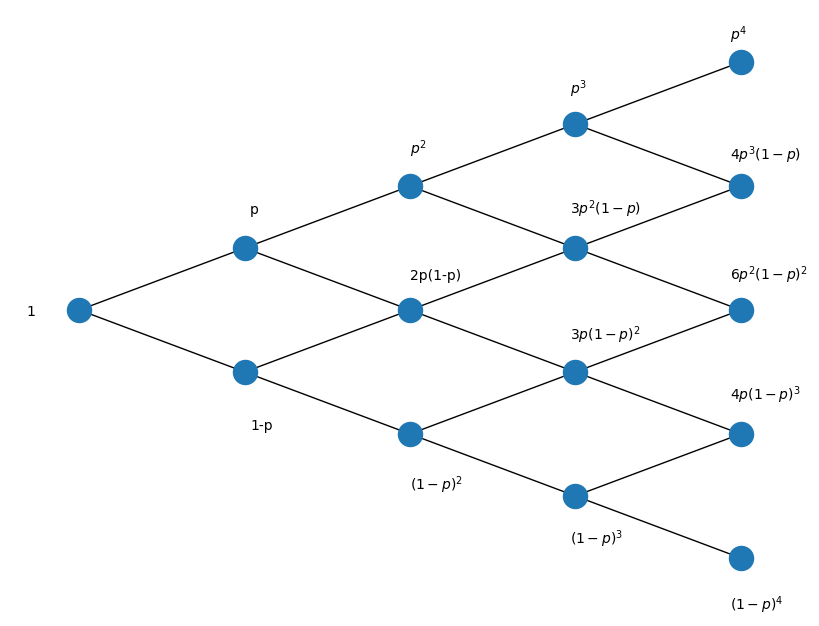

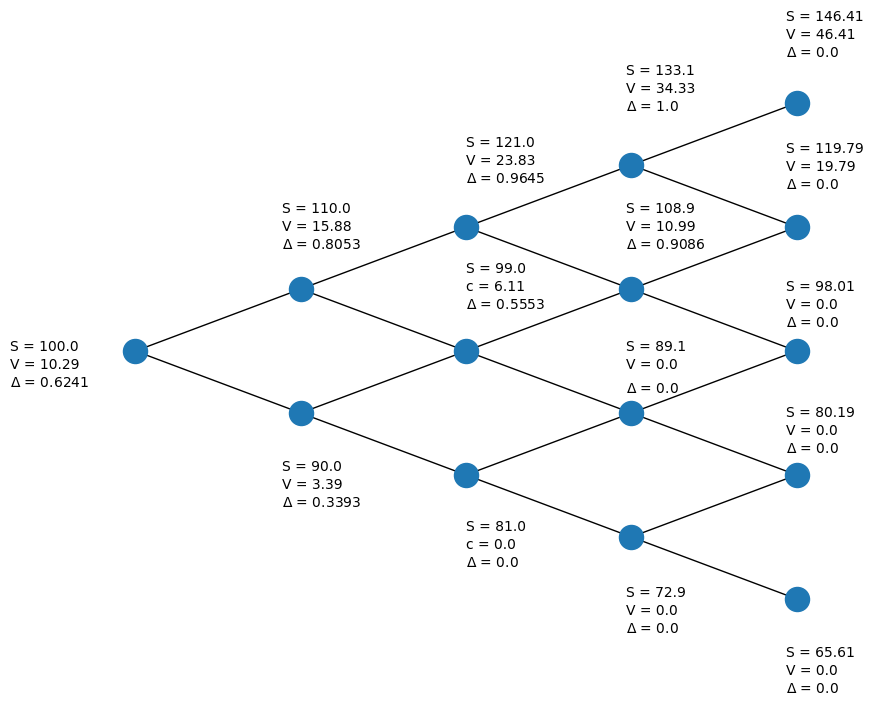

In [1]:
## Binomial Pricing Model
# Import math functions from NumPy
from numpy import *

# Import plotting functions from helper 
from helper import plot_asset_path, plot_probability, plot_binomial_tree

# Plot asset price path
plot_asset_path()

# Plot node probability
plot_probability()

# Let's now define a binomial option pricing function
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    
    # define parameters
    ts = time/steps                                 # ts is time steps, dt
    u = 1 + sigma*sqrt(ts)                          # u is up factor
    v = 1 - sigma*sqrt(ts)                          # v is down factor
    p = 0.5 + rate*sqrt(ts)/(2*sigma)               # p here is risk neutral probability (p') - for ease of use
    df = 1/(1+rate*ts)                              # df is discount factor

    # initialize arrays
    px = zeros((steps+1, steps+1))                  # price path
    cp = zeros((steps+1, steps+1))                  # call intrinsic payoff
    V = zeros((steps+1, steps+1))                   # option value
    d = zeros((steps+1, steps+1))                   # delta value
    
    # binomial loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot * power(v,i) * power(u,j-i)
            cp[i,j] = maximum(px[i,j] - strike,0)
            
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j == steps+1):
                V[i,j-1] = cp[i,j-1]                # terminal payoff
                d[i,j-1] = 0                        # terminal delta
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
                    
    results = around(px,2), around(cp,2), around(V,2), around(d,4)
    
    return results[output]

# Asset price
px = binomial_option(100,100,0.05,0.2,1,4,0)
px

# Intrinsic value of call options
cp=binomial_option(100,100,0.05,0.2,1,4,1)
cp

# Option price 
opx=binomial_option(100,100,0.05,0.2,1,4,2)
opx

# Option delta
delta=binomial_option(100,100,0.05,0.2,1,4,3)
delta

# Binomial Option Price
print(f"European Call Option Price using Binomial Tree Method: {opx[0,0]:.2f}")

# Plot a 4-Step Binomial Tree 
plot_binomial_tree(px[0,0], px, opx, delta)

In [2]:
# Import Pandas, Numpy and Scipy
import pandas as pd
import numpy as np
from scipy.stats import norm

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt
# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)
import yfinance as yf

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Fetch data by specifying the the start and end dates
spy = yf.download('SPY', start='2020-02-01', end='2023-02-10', progress=True)
# Display the first five rows of the dataframe to check the results. 
spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03 00:00:00-05:00,323.350006,326.160004,323.220001,324.119995,308.979980,69083000
2020-02-04 00:00:00-05:00,328.070007,330.010010,327.720001,329.059998,313.689178,62573200
2020-02-05 00:00:00-05:00,332.269989,333.089996,330.670013,332.859985,317.311707,65951100
2020-02-06 00:00:00-05:00,333.910004,334.190002,332.799988,333.980011,318.379395,50359700
2020-02-07 00:00:00-05:00,332.820007,333.989990,331.600006,332.200012,316.682465,64139400


In [7]:
# Calculate returns and add it to existing DataFrame as a column
spy['Return'] = spy['Adj Close'].pct_change().fillna(0)

In [8]:
# Calculate mean and sigma
mu = np.mean(spy['Return'])
sigma = np.std(spy['Return'])

print(f'Mean {mu:.6f}, Sigma {sigma:.6f}')

Mean 0.000487, Sigma 0.015746


In [4]:
spy[['Adj Close']].iplot()

In [9]:
# Calculate the scaled return
spy['Scaled_Return'] = spy['Return'].apply(lambda x: (x - mu)/sigma)

# Check the output
spy.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scaled_Return
Date,,,,,,,,
2020-02-03 00:00:00-05:00,323.350006,326.160004,323.220001,324.119995,308.979980,69083000,0.000000,-0.030907
2020-02-04 00:00:00-05:00,328.070007,330.010010,327.720001,329.059998,313.689178,62573200,0.015241,0.937003
2020-02-05 00:00:00-05:00,332.269989,333.089996,330.670013,332.859985,317.311707,65951100,0.011548,0.702475
2020-02-06 00:00:00-05:00,333.910004,334.190002,332.799988,333.980011,318.379395,50359700,0.003365,0.182779
2020-02-07 00:00:00-05:00,332.820007,333.989990,331.600006,332.200012,316.682465,64139400,-0.005330,-0.369390


In [10]:
# Calculate minimum and maximum bin range
sr_min = np.min(spy['Scaled_Return'])
sr_max = np.max(spy['Scaled_Return'])

print(f'Minimum {sr_min:.6f}, Maximum {sr_max:.6f}')

Minimum -6.980027, Maximum 5.722992


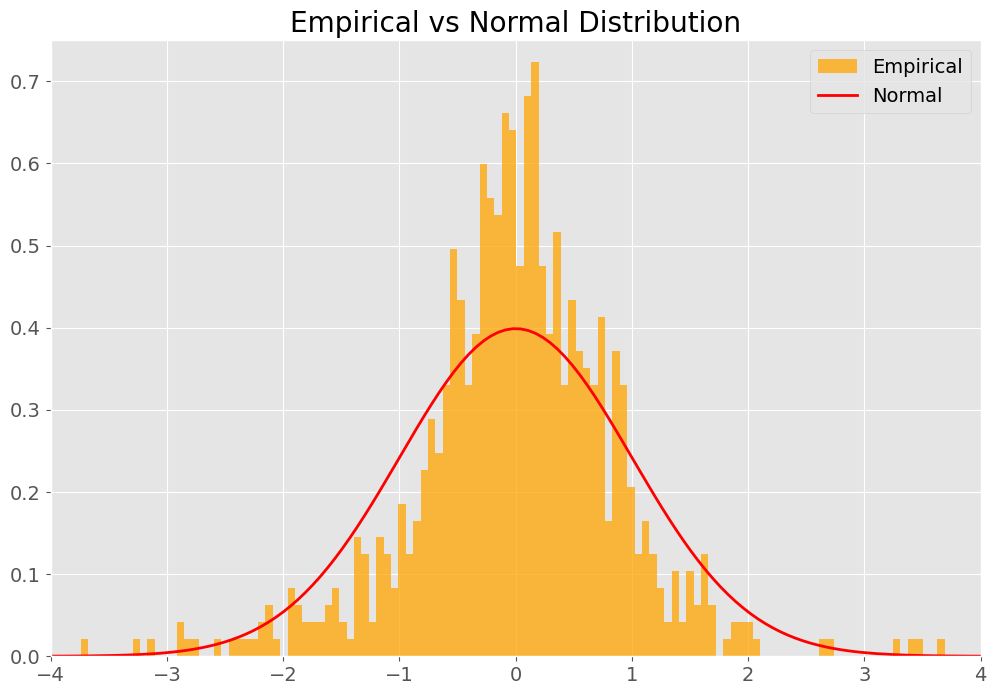

In [12]:
# Define bins
x = np.linspace(sr_min, sr_max, 200)

# Calculate normal probability density function
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2))          # can also use norm.pdf(x,0,1)

# Plot histogram of scaled returns
plt.hist(spy['Scaled_Return'], bins=200, density=True, color = 'orange', label = 'Empirical', alpha=0.75)

# Plot norm pdf
plt.plot(x, y, color = 'red', label = 'Normal', alpha=1)

# Set x and y axis limits
plt.xlim(-4,4)
plt.ylim(0,0.75)

# Set title
plt.title('Empirical vs Normal Distribution')

# Set legends
plt.legend();